# Analysis-7 Final Analysis

You’ve had the opportunity to analyze two datasets thus far; now it’s time to analyze a dataset of your own. Find a dataset online and use Spark (or Hadoop) to analyze it. You should:

1. Describe the dataset (Earthquack)
2. Outline the types of insights you hope to gain from it
3. Make hypotheses about what you might find
4. Design at least 3 “questions” (along the lines of those above) and answer them. Remember that presentation matters here. ML Models are a good choice for some of the datasets; you can describe what you’ll try to predict or classify and outline your experiences with various models.


## Description 

### **Describe the dataset:**
In this Problem Analysis, we have used 2 dataset: <br/>

1. Three THz databases: 
[NIST](https://physics.nist.gov/PhysRefData/ASD/lines_form.html)

2. Earthquake database:
[USGS](https://earthquake.usgs.gov/earthquakes/search/) <br/>
We will talk about Earthquake data base in the second section


### **Outline the types of insights you hope to gain from it:**
After this statistic analysis we hope to gain the following information:

1) Tera Herts Prediction - In this study we try to predict the required frequency to receive a certain gas in the gas chamber. 

### **Make hypotheses about what you might find:**

Our study in this question is about Tera Hertz environment, clean room chamber and Gas measurement. This test environment is not easy to be build,  access and generaye tera herts frequency. <br/>
In addition, running the test needs chamber calibration and several setups that is time consuming and costly operation. <br/>
We would like to use machine learning based on the conducted test result to predict the presence of some gas in the chamber like CF4, C4F6, SF6, NF3, CL2, HBr and Ar when the frequency increased (THz). <br/>
The question is in which frequency we can find the particular gas without conducting the test. 
***(Getting test result without conducting the test)***

### Design Question

### **Question 1: Composition Detection:**


####  In which Tera Hertz frequency we can find the particular gas without conducting the test?



### Backround:
### ***All data in this section is confidential, Please do not expose it to others*** <br/>
A requirement has been located to detect and identify chemical composition of process gases in semiconductor processing. 
 - Gas Species Detection
 - Molecular Density Detection
 - Particle Detection
 
Additional applications for composition detection exist such as solid, Liquid, Gas, Plasma Composition Detection

### Use Cases:

- Plasma Etch for Semiconductor Processing
- Factory Emissions
- Process Gas
- Agriculture Gas


Semiconductor fabrication applications currently have very accurate Mass Flow Controllers for gas as well as a mixture sensor, but have less capability to detect the reactions and mixtures inside the chamber, so composition detection is an area that holds a lot of promise and potential value. <br/>

The idea was generated from a need to monitor gas composition in a plasma etch chamber.  This chamber has a number of gases inside that are converted to a plasma.  The gas composition in the chamber is not always known or obvious.  A desired result is to be able to detect the composition of the gas at any point within the chamber.

Sensing Composition is showing in the following Figure:

![Sensing Composition](decomposition1.png)
**Sensing Composition**

A test condition is shown bellow:


![Test Environment](decomposition2.png)
**Test Environment**

In [21]:
%%time
import pandas as pd
    
# Load data
gas_file_path = '/home4/rteymourzadeh/Project3BigData/P3-p3-hiep_alper_team/A7_Final_Analysis/ab_all2.csv'
gas_data = pd.read_csv(gas_file_path) 
print(gas_data.columns)
gas_data.head() 



Index(['Frequency', 'T0Magnitude', 'T1Magnitude', 'T2Magnitude', 'T3Magnitude',
       'T4Magnitude', 'T5Magnitude'],
      dtype='object')
CPU times: user 4.53 ms, sys: 35 µs, total: 4.57 ms
Wall time: 7.7 ms


,Frequency,T0Magnitude,T1Magnitude,T2Magnitude,T3Magnitude,T4Magnitude,T5Magnitude
0,500000000000,-6.343524,2.760528,3.605897,3.605897,3.783415,3.266107
1,500625000000,-2.896793,9.467415,9.451552,9.451552,9.099237,10.419175
2,501250000000,-5.108785,2.764290,3.428777,3.428777,3.711671,4.391353
3,501875000000,-4.820845,4.679888,2.065727,2.065727,1.236219,2.071507
4,502500000000,2.627637,5.532441,5.513204,5.513204,5.661697,6.431253


Text(0, 0.5, 'Magnitude')

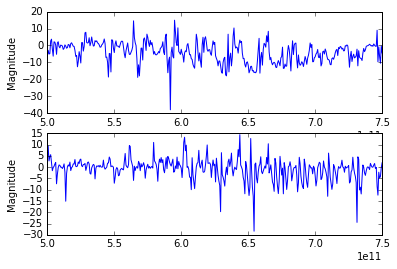

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import seaborn as sns

# df = pd.read_csv('/home4/rteymourzadeh/Project3BigData/P3-p3-hiep_alper_team/A7_Final_Analysis/ab_all2.csv', index_col=0)
# print(df.columns)
# df.head()

Frequency = gas_data.Frequency

plt.subplot(2, 1, 1)
T0= gas_data.T0Magnitude
plt.plot(Frequency ,T0)
plt.ylabel('Magnitude')


plt.subplot(2, 1, 2)
T1= gas_data.T1Magnitude
plt.plot(Frequency ,T1)
plt.ylabel('Magnitude')



**Note: Test Condition:**
Quartz Window Data:
- Data taken through a single crystal quartz window
- atm-x --- series of data taken with chamber at atmosphere, far side covered with metal blank, chamber was raised and standard removed, then replaced and relowered between  measurments



In [49]:
gas_data.columns
print(gas_data.columns)

# Choose target and features
y = gas_data.Frequency
gas_test_features =['T0Magnitude', 'T1Magnitude', 'T2Magnitude', 'T3Magnitude', 'T4Magnitude','T5Magnitude']

x = gas_data[gas_test_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(x, y,random_state = 0)

Index(['Frequency', 'T0Magnitude', 'T1Magnitude', 'T2Magnitude', 'T3Magnitude',
       'T4Magnitude', 'T5Magnitude'],
      dtype='object')


In [57]:
%%time
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
import numpy as np

np_arr1 = np.array([[-20.343523893, -20.343523893, -20.343523893, -20.343523893, -20.343523893 , -20.343523893]])


# from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators=100,random_state=1)
# forest_model = LinearRegression()

# forest_model.fit(train_X, train_y)
forest_model.fit(train_X,train_y)


# val_X=val_X.insert([4],[2017])
gas_preds = forest_model.predict(np_arr1)
print("The frequency that Hydrogen may exist in THz is:", gas_preds)


The frequency that Hydrogen may exist in THz is: [6.4920625e+11]
CPU times: user 115 ms, sys: 5.9 ms, total: 121 ms
Wall time: 119 ms


### Result
THz wave is emitted to the gas. Absorption is measured and then the gas composition can be detected. 
This research has an application as a Gas Sensor.<br/>
Machine Learning approach helps us to predict the frequency which a specific gas (here Nytrogen) may appear. 

The interpretion of the existing gas in the chamber is shown here that shows machine learning predic correctly:

![Test Environment](decomposition3.png)


## Description 

### **Describe the dataset:**
In this Problem Analysis, we have used "USGS"science for changing world website as our dataset with the following weblink:
[USGS](https://earthquake.usgs.gov/earthquakes/search/)

The area under analysis is shown in the following image. ![Area under analysis](earthquake2.png)

### **Outline the types of insights you hope to gain from it:**
After this statistic analysis we hope to gain the following information:

1) How much does people pay attention to earthquake issue in the reddit platform <br/>
2) Predict for estimated number of earthquake may happen in 2020 <br/>
3) Predict for the largest strong earthquake may happen in 2020 <br/>

### **Make hypotheses about what you might find:**

We expect earthquake topic attracts more attention specially in the year that many earthquakes happen. 
We expect people talk more about the topic related to earthquake.
In addition, we exect the number of happening earthquake and the power of the earthquakes follow a linear behaviour in a single decade. 

## **Design Questions:**



### ***Question 2: How many people did talk about earthquake in the subreddit during the earthquicl time and the correlation with the real earthquake date?***

### ***Question3: Use Machine Learning to  calculate the maximum number of earthquake in 2020?***

### ***Question4: Use Machine Learning to calculate the strongest earthquick may happen in 2020?***

# Read and Filter the Sampled Data 

Based on the given data set, we will find the unique user numbers in reddit for each month and then we will make prediction for upcoming month's unique user numbers. (We will use ML models) By doing this reddit development team can prepare themselves for upcoming load.

In [1]:
%%time
spark.catalog.dropGlobalTempView("Comments")
df = sqlContext.read.json("hdfs://orion11:11001/sampled_reddit_v3/*")
df.createGlobalTempView("Comments")

CPU times: user 5 ms, sys: 5.02 ms, total: 10 ms
Wall time: 23.8 s


In [2]:
%%time
botExpr = "[bB][oO][tT]"

filteredComment = (df
                   .filter(~(df.body.like("[deleted]") 
                             | df.body.like('[removed]') 
                             | df.author.rlike(botExpr) 
                             | df.author.like("[deleted]")
                            )
                          )
                  )
df.unpersist()
filteredComment.cache()
print(filteredComment.count())

2742841
CPU times: user 11.7 ms, sys: 2.55 ms, total: 14.2 ms
Wall time: 34.7 s


### Add month and year column into the dataset

In [3]:
%%time
from pyspark.sql.functions import year, month, dayofmonth, from_unixtime
from pyspark.sql.types import DateType

filteredComment = (filteredComment
      .withColumn("year", year(from_unixtime("created_utc").cast(DateType())))
      .withColumn("month",month(from_unixtime("created_utc").cast(DateType()))))
filteredComment.count()

CPU times: user 13.4 ms, sys: 3.09 ms, total: 16.5 ms
Wall time: 1.19 s


2742841

### Question 2: How many people did talk about earthquake in the subreddit during the earthquicl time and the correlation with the real earthquake date?

Here we have targetted the US regien as shown above and based on the dataset collected from 2006 up to 2017 the number of earthquakes are calculated in the dataset.
In addition, we have used the reddit data set to see the number of people who commented about earthquakes.

In [2]:
%%time
originDF = sqlContext.read.json("hdfs://orion11:11001/sampled_reddit_v3/*")

CPU times: user 3.73 ms, sys: 77 µs, total: 3.81 ms
Wall time: 3.37 s


In [8]:
# SAMPLED Data
import pyspark.sql.functions as func

#df = sqlContext.read.json("hdfs://orion11:41001/sampled_reddit/*")
#df.createOrReplaceTempView("comments")
# df.saveAsTable("Unique subreddit comments")

# subredditDF = filteredComment.select("subreddit").distinct()

subredditDf = filteredComment.groupBy('year','subreddit').agg(func.count(func.lit(1)))
subredditDf.show()
subredditDf = (subredditDf
               .filter(subredditDf.subreddit.rlike('earthquake'))
               .groupBy('year')
               .agg(func.count(func.lit(1)).alias('NumofSubReddit')))

subredditDf.show()


# subredditDF = SubrredditDF.filterBy('subredd')(subreddit
#                         .groupBy('year')
#                         .agg(func.count('Earthquake').alias('numOfComments')))


# sqlDF=spark.sql("SELECT count(distinct subreddit) AS Unique_Subreddit from comments")
# sqlDF.show()



# df = sqlContext.read.json("hdfs://orion11:41001/reddit/*")
# df.createOrReplaceTempView("Comments")

# Read from 2005 to 2017

# sqlDF=spark.sql("SELECT subredit,count(*) AS CommentCount from Comments and subreddit='Earthquake' and (created_utc>=1104552009000 and created_utc<=1328054399)")

# sqlDF.show()
# sqlDF.show(df.count())


+----+--------------------+--------+
|year|           subreddit|count(1)|
+----+--------------------+--------+
|2014|          skyrimmods|     136|
|2014|                deaf|       8|
|2014|               dubai|      30|
|2014|                lost|      20|
|2014|        raspberry_pi|      59|
|2014|terriblefacebookm...|      16|
|2014|       ClickerHeroes|      89|
|2014|            GameSale|      52|
|2014|RandomActsOfChris...|      14|
|2014|         RateMyMayor|      90|
|2014|              Flyers|      94|
|2014|          EmeraldPS2|      19|
|2014|     douglovesmovies|       5|
|2015|               trees|    2034|
|2015|      TumblrInAction|    1815|
|2014|          glassheads|      30|
|2015|           firewater|       6|
|2015|            formula1|     842|
|2014|              ukguns|       5|
|2015|              Nissan|      10|
+----+--------------------+--------+
only showing top 20 rows

+----+--------------+
|year|NumofSubReddit|
+----+--------------+
+----+--------------

 The following table counts the number of comments in the subreddit between the years 2006 up to 2017. The actual number of earthquakes are also calculated based on Science for changing word dataset.

In [10]:
earthquakeComment = filteredComment.filter(filteredComment.body.rlike('earthquake'))
countDF = earthquakeComment.groupBy('year').agg(func.count(func.lit(1))).sort(func.desc('year'))
countDF.show()

+----+--------+
|year|count(1)|
+----+--------+
|2017|      19|
|2016|      95|
|2015|      84|
|2014|      59|
|2013|      39|
|2012|      40|
|2011|      21|
|2010|       8|
|2009|       1|
|2008|       2|
+----+--------+



In [11]:
countDF.coalesce(1).write.format('csv').save('hdfs://orion11:41001/A7')

In [15]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load('hdfs://orion11:41001/Earthquake/2017.csv')
df.count()

3228

#### Result: 

Although the number of comments were increased year by year except for 2017, however there is no strong correlation between subreddit comments and the number of actual earthquakes registered in the dataset. There may be the possibility that people used different platform rather than Reddit to talk about earthquake.


![Q1 - Analysis](earthquake1.png)

### Question 3: Use Machine Learning to  calculate the maximum number of earthquake in 2020?

We have used the same dataset taken from the “science for changing world website” to train the system for predicting the number of earthquakes in 2020. In this model the linear regression model was considered. The data for 2006 till 2017 is considered to train the data.
 


In [26]:
%%time
import pandas as pd
    
# Load data
earthquake_file_path = '/home4/rteymourzadeh/Project3BigData/P3-p3-hiep_alper_team/A7_Final_Analysis/ML.csv'
earthquake_data = pd.read_csv(earthquake_file_path) 
earthquake_data.columns

# Choose target and features
y = earthquake_data.Earthquake
earthquake_features =['Year']

X = earthquake_data[earthquake_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

CPU times: user 3.87 ms, sys: 970 µs, total: 4.84 ms
Wall time: 8.24 ms


In [27]:
%%time
#ML.csv (Year,earthquake)
import numpy as np
np_arr1 = np.array([[2018],[2019],[2020]])


from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#forest_model = RandomForestRegressor(n_estimators=100,random_state=1)
forest_model = LinearRegression()

forest_model.fit(train_X, train_y)
#forest_model.fit(X,y)

val_X=np.append(val_X,np_arr1,axis=0)  
print(val_X)


#val_X=val_X.insert([4],[2017])
melb_preds = forest_model.predict(val_X)
print(melb_preds)
#print('Mean_absolute_error:',mean_absolute_error(val_y, melb_preds))
#print(val_X.dtypes)

[[2012]
 [2017]
 [2010]
 [2018]
 [2019]
 [2020]]
[2723.9537037  4098.16666667 2174.26851852 4373.00925926 4647.85185185
 4922.69444444]
CPU times: user 2.76 ms, sys: 0 ns, total: 2.76 ms
Wall time: 1.74 ms


### Result and Discussion

We tried to calculate the number of earthquakes that may happened in 2018, 2019 and 2020. Those values are: 

Colons can be used to align columns.

#### Trained Data:

**No** | **Year** | **Earthquake**
--- | --- | ---
1 | 2018 | 4373
2 | 2019 | 4647
3 | 2020 | 4922

Since we have a real data from the data set for 2018 and 2019 we can see the accuracy of the model: 

#### Real Data:

**No** | **Year** | **Earthquake**
--- | --- | ---
1 | 2018 | 2135
2 | 2019 | 4152
3 | 2020 | ?



![Q2 - Analysis](earthquake3.png)


The trained result is shown in the above graph. It shows 4373 and 4647 earthquakes for the 2018 and 2019 respectively.  Although, the trend is increasing for the number of the earthquakes that looks correct prediction, yet still not accurate for 2018. The model can improve using more data to train the model or we can use classifier model instead of regression model. 

### Question 4: Use Machine Learning to calculate the strongest earthquick may happen in 2020?

An earthquake radiates energy in the form of different kinds of seismic waves, whose characteristics reflect the nature of both the rupture and the earth's crust the waves travel through.Determination of an earthquake's magnitude generally involves identifying specific kinds of these waves on a seismogram, and then measuring one or more characteristics of a wave, such as its timing, orientation, amplitude, frequency, or duration. 
Additional adjustments are made for distance, kind of crust, and the characteristics of the seismograph that recorded the seismogram. Sample of magnitude scale is shown in the following figure.
In this question, we have used the same dataset taken from the “science for changing world website” to train the system for predicting the earthquakes magnitude in 2020. In this model the linear regression model was considered. The data for 2006 till 2017 is considered to train the data.


In [1]:
%%time
import pandas as pd
    
# Load data
earthquake_file_path = '/home4/rteymourzadeh/Project3BigData/P3-p3-hiep_alper_team/A7_Final_Analysis/ML2.csv'
earthquake_data = pd.read_csv(earthquake_file_path) 
earthquake_data.columns

# Choose target and features
y = earthquake_data.Earthquake
earthquake_features =['Year']

X = earthquake_data[earthquake_features]

from sklearn.model_selection import train_test_split

# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

CPU times: user 754 ms, sys: 111 ms, total: 865 ms
Wall time: 6.82 s


In [2]:
%%time
#ML2.csv (Year,earthquake)
import numpy as np
np_arr1 = np.array([[2018],[2019],[2020]])


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

forest_model = LinearRegression()

forest_model.fit(train_X, train_y)

val_X=np.append(val_X,np_arr1,axis=0)  
print(val_X)

melb_preds = forest_model.predict(val_X)
print(melb_preds)


[[2012]
 [2017]
 [2010]
 [2018]
 [2019]
 [2020]]
[5.87833333 5.57       6.00166667 5.50833333 5.44666667 5.385     ]
CPU times: user 19.6 ms, sys: 7.89 ms, total: 27.5 ms
Wall time: 518 ms


### Result and Discussion

We tried to calculate the number of earthquakes that may happened in 2018, 2019 and 2020. Those values are: 

Colons can be used to align columns.

#### Trained Data:

**No** | **Year** | **Earthquake**
--- | --- | ---
1 | 2018 | 5.5
2 | 2019 | 5.4
3 | 2020 | 5.3

Since we have a real data from the data set for 2018 and 2019 we can see the accuracy of the model: 

#### Real Data:

**No** | **Year** | **Earthquake**
--- | --- | ---
1 | 2018 | 5.29
2 | 2019 | 7.1
3 | 2020 | ?



![Q3 - Analysis](earthquake5.png)

The trained result is shown in the above graph. It shows 5.5 and 5.4 and 5.3 magnitude earthquakes for the respective year of 2018 , 2019 and 2020. Although, the trend shows decreasing value for the magnitude of the earthquakes that looks correct prediction, yet still not accurate for 2019. The model can improve using more data to train the model.

### Reference

[1] Dataset: [USGS](https://earthquake.usgs.gov/earthquakes/search/) <br/>
[2] Earthquake Wiki: [Earthquake](https://en.wikipedia.org/wiki/Seismic_magnitude_scales) <br/>
[3] NIST: [NIST](https://physics.nist.gov/PhysRefData/ASD/lines_form.html)
